# Chat Message History

###### Run the line of code below to check the version of langchain in the current environment.
###### Substitute "langchain" with any other package name to check their version.

##### * LangChain incorporates seven modules: Prompts, Models, Memory, Indexes, Chains, Agents, and Callbacks.

### Memory:
##### The Memory module in LangChain is designed to retain a concept of the state throughout a user’s interactions with a language model. Statelessness means that language model treats each incoming query independently. However, in certain applications like chatbots, it is crucial to remember previous interactions at both short-term and long-term levels. Passing the entire conversation as a context to the language model is not an optimal solution, as the number of tokens can quickly increase and potentially exceed the allowed limit. 



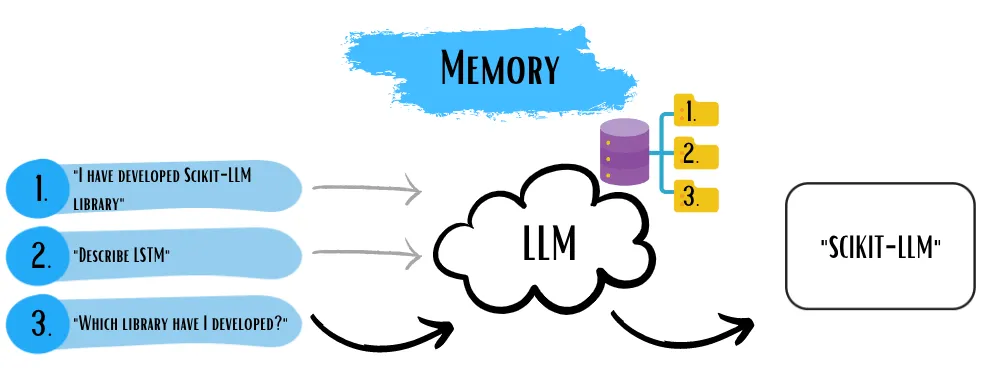

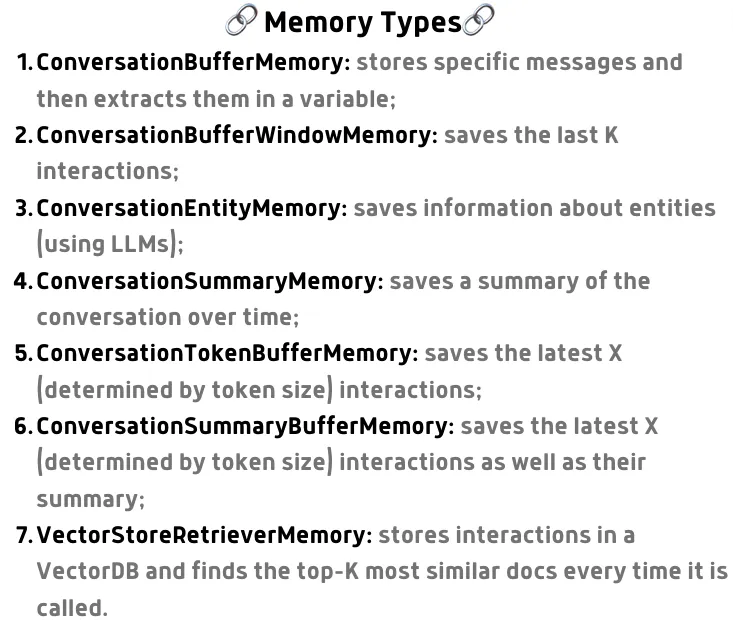

In [39]:
pip show langchain

Name: langchain
Version: 0.3.20
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\users\hp\anaconda3\envs\longchain_envllm\lib\site-packages
Requires: async-timeout, langchain-core, langchain-text-splitters, langsmith, pydantic, PyYAML, requests, SQLAlchemy
Required-by: langchain-community
Note: you may need to restart the kernel to use updated packages.


In [40]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [41]:
# pip install langchain_community

###### How do we implement our Chatbot so that it remembers the dialogue?

In [42]:
from langchain_openai.chat_models import ChatOpenAI

from langchain_core.prompts import (ChatPromptTemplate, 
                                    HumanMessagePromptTemplate)

from langchain.chains.llm import LLMChain

from langchain_community.chat_message_histories import ChatMessageHistory

In [43]:
chat = ChatOpenAI(model_name = 'gpt-4', 
                  model_kwargs = {'seed':365},
                  temperature = 0,
                  max_tokens = 100)

C:\Users\HP\anaconda3\envs\longchain_envllm\lib\site-packages\IPython\core\interactiveshell.py:3519: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  if await self.run_code(code, result, async_=asy):


In [44]:
background_info = ChatMessageHistory()
background_info

InMemoryChatMessageHistory(messages=[])

In [45]:
background_info.add_user_message("Can you give me an interesting fact I probably didn't know about?")
background_info.add_ai_message("Sure, did you know that the longest place name on the planet is 85 letters long?")

##### * User Message (add_user_message) Human (User): This represents a user message, meaning it is a message that the user (human) has sent.
##### * AI Message (add_ai_message) AI (ChatGPT): This represents an AI message, meaning it is a message that the AI (ChatGPT) has responded with.

In [46]:
background_info.messages

[HumanMessage(content="Can you give me an interesting fact I probably didn't know about?", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Sure, did you know that the longest place name on the planet is 85 letters long?', additional_kwargs={}, response_metadata={})]

In [47]:
background_info.json()

C:\Users\HP\AppData\Local\Temp\ipykernel_3764\2393208240.py:1: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  background_info.json()


'{"messages":[{"content":"Can you give me an interesting fact I probably didn\'t know about?","additional_kwargs":{},"response_metadata":{},"type":"human","name":null,"id":null},{"content":"Sure, did you know that the longest place name on the planet is 85 letters long?","additional_kwargs":{},"response_metadata":{},"type":"ai","name":null,"id":null}]}'

In [48]:
background_info.dict()

C:\Users\HP\AppData\Local\Temp\ipykernel_3764\2392361149.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  background_info.dict()


{'messages': [{'content': "Can you give me an interesting fact I probably didn't know about?",
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': None,
   'id': None},
  {'content': 'Sure, did you know that the longest place name on the planet is 85 letters long?',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'ai',
   'name': None,
   'id': None}]}

In [49]:
background_info.schema()

C:\Users\HP\AppData\Local\Temp\ipykernel_3764\2821284721.py:1: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  background_info.schema()


{'$defs': {'BaseMessage': {'additionalProperties': True,
   'description': 'Base abstract message class.\n\nMessages are the inputs and outputs of ChatModels.',
   'properties': {'content': {'anyOf': [{'type': 'string'},
      {'items': {'anyOf': [{'type': 'string'}, {'type': 'object'}]},
       'type': 'array'}],
     'title': 'Content'},
    'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
    'response_metadata': {'title': 'Response Metadata', 'type': 'object'},
    'type': {'title': 'Type', 'type': 'string'},
    'name': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'title': 'Name'},
    'id': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
     'default': None,
     'title': 'Id'}},
   'required': ['content', 'type'],
   'title': 'BaseMessage',
   'type': 'object'}},
 'description': 'In memory implementation of chat message history.\n\nStores messages in a memory list.',
 'properties': {'messages': {'items': {'$ref': '#/$defs/

In [50]:
# Invoke the model with the chat history
response = chat.invoke(background_info.messages)

# Print the model's response
print(response.content)

Yes, it's a hill in New Zealand and it's called "Taumatawhakatangihangakoauauotamateaturipukakapikimaungahoronukupokaiwhenuakitanatahu". It roughly translates to "The summit where Tamatea, the man with the big knees, the slider, climber of mountains, the land-swallower who travelled about, played his nose flute to his loved one".


In [51]:
background_info.clear()

In [52]:
background_info.add_user_message("Can you give me an interesting fact I probably didn't know about?")
background_info.add_ai_message("Sure, did you know that the longest place name on the planet is 85 letters long?")

In [53]:
message_template_h = HumanMessagePromptTemplate.from_template(template = '{follow-up question}')

In [54]:
chat_template = ChatPromptTemplate.from_messages(background_info.messages + [message_template_h])

In [55]:
chat_template

ChatPromptTemplate(input_variables=['follow-up question'], input_types={}, partial_variables={}, messages=[HumanMessage(content="Can you give me an interesting fact I probably didn't know about?", additional_kwargs={}, response_metadata={}), AIMessage(content='Sure, did you know that the longest place name on the planet is 85 letters long?', additional_kwargs={}, response_metadata={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['follow-up question'], input_types={}, partial_variables={}, template='{follow-up question}'), additional_kwargs={})])

In [56]:
chain = LLMChain(llm = chat, prompt = chat_template)

In [57]:
response = chain.invoke({'follow-up question':'What does the name mean?'})

In [58]:
response

{'follow-up question': 'What does the name mean?',
 'text': 'The name is "Taumatawhakatangihangakoauauotamateaturipukakapikimaungahoronukupokaiwhenuakitanatahu," a hill in New Zealand. The name roughly translates to "The summit where Tamatea, the man with the big knees, the slider, climber of mountains, the land-swallower who travelled about, played his nose flute to his loved one" in English.'}

In [59]:
print(response['text'])

The name is "Taumatawhakatangihangakoauauotamateaturipukakapikimaungahoronukupokaiwhenuakitanatahu," a hill in New Zealand. The name roughly translates to "The summit where Tamatea, the man with the big knees, the slider, climber of mountains, the land-swallower who travelled about, played his nose flute to his loved one" in English.


## ----------------------------------------------------

### 🎥 Does AI Have Memory? Let’s Find Out with Code!
### ⚡ How AI Remembers What You Say (With Live Coding!)
### 🔎 AI That Doesn’t Forget: The Secret Behind Chat Memory!
### 🚀 Making AI More Human: The Power of Memory in Chatbots!
### 📚 AI With Memory vs. AI Without Memory: See the Difference!

### 📝 How to Store & Recall Chat History Using Python!
### 💡 Using LangChain for Chat Memory: Step-by-Step Guide!
### 🔄 Persistent Chat Memory: Storing AI Conversations!
### 📜 AI Chatbots with Memory: Implementing ChatMessageHistory!
### 🔍 Building AI That Remembers: Python Code Walkthrough!

### 🚀 Mastering Memory in AI: How ChatGPT Remembers Conversations!
### 🤖 Understanding AI Memory: Storing & Retrieving Conversations!
### 🧠 How AI Models Use Memory: A Deep Dive with Code!
### 🔥 Building Smarter AI with Chat History & Memory!
### 🏆 AI Memory Explained: Storing Context in Chat Models!

# Conversation Buffer Memory: Implementing the Setup

In [60]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [61]:
from langchain_openai.chat_models import ChatOpenAI

from langchain_core.messages import SystemMessage
from langchain_core.prompts import (ChatPromptTemplate, 
                                    HumanMessagePromptTemplate, 
                                    MessagesPlaceholder)

from langchain.chains.llm import LLMChain

from langchain_community.chat_message_histories import ChatMessageHistory
from langchain.memory import ConversationBufferMemory

# Import set verbose.
# The set verbose function does precisely what its name suggests.
# Display the output in a verbose mode.
# Therefore, when we execute our chain, we'll see the chatbot's final response and the intermediate
# steps.
# This allows for better monitoring of the process and helps with debugging.
# To activate this verbose mode, however, we should call the function and pass true as an argument.
# All right.
# In the bottom cell, let's create an instance of the system message class instructing the chatbot to
# answer questions sarcastically.

from langchain.globals import set_verbose
set_verbose(True)

In [62]:
chat = ChatOpenAI(model_name = 'gpt-4', 
                  model_kwargs = {'seed':365},
                  temperature = 0,
                  max_tokens = 100)

C:\Users\HP\anaconda3\envs\longchain_envllm\lib\site-packages\IPython\core\interactiveshell.py:3519: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  if await self.run_code(code, result, async_=asy):


In [63]:
message_s = SystemMessage(content = '''The chatbot should reluctantly answer questions with sarcastic responses.''')
message_template_h = HumanMessagePromptTemplate.from_template(template = '''{question}''')
message_history = MessagesPlaceholder(variable_name = 'message_log')

chat_template = ChatPromptTemplate.from_messages([message_s, message_history, message_template_h])


In [64]:
chat_template

ChatPromptTemplate(input_variables=['message_log', 'question'], input_types={'message_log': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[

In [70]:
background_info = ChatMessageHistory()
background_info.add_user_message('Hi!')
background_info.add_ai_message("You really know how to make an entrance, don't you?")

In [71]:
chain = LLMChain(llm = chat, prompt = chat_template)

In [76]:
background_info.messages[-1].content

"You really know how to make an entrance, don't you?"

In [77]:
background_info.messages

[HumanMessage(content='Hi!', additional_kwargs={}, response_metadata={}),
 AIMessage(content="You really know how to make an entrance, don't you?", additional_kwargs={}, response_metadata={})]

In [74]:
response = chain.invoke({
    "question": background_info.messages[-1].content,
    "message_log": background_info.messages
})




> Entering new LLMChain chain...
Prompt after formatting:
System: The chatbot should reluctantly answer questions with sarcastic responses.
Human: Hi!
AI: You really know how to make an entrance, don't you?
Human: You really know how to make an entrance, don't you?

> Finished chain.


In [75]:
print(response['text'])


Oh, wow. You're so original. I've never heard that one before.


# Conversation Buffer Memory: Configuring the Chain

In [78]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [79]:
from langchain_openai.chat_models import ChatOpenAI

from langchain_core.messages import SystemMessage
from langchain_core.prompts import (ChatPromptTemplate, 
                                    HumanMessagePromptTemplate, 
                                    MessagesPlaceholder)

from langchain.chains.llm import LLMChain

from langchain_community.chat_message_histories import ChatMessageHistory
from langchain.memory import ConversationBufferMemory

from langchain.globals import set_verbose
set_verbose(True)

In [80]:
chat = ChatOpenAI(model_name = 'gpt-4', 
                  model_kwargs = {'seed':365},
                  temperature = 0,
                  max_tokens = 100)

C:\Users\HP\anaconda3\envs\longchain_envllm\lib\site-packages\IPython\core\interactiveshell.py:3519: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  if await self.run_code(code, result, async_=asy):


In [81]:
message_s = SystemMessage(content = '''The chatbot should reluctantly answer questions with sarcastic responses.''')
message_template_h = HumanMessagePromptTemplate.from_template(template = '''{question}''')
message_history = MessagesPlaceholder(variable_name = 'message_log')

chat_template = ChatPromptTemplate.from_messages([message_s, message_history, message_template_h])

In [82]:
chat_template

ChatPromptTemplate(input_variables=['message_log', 'question'], input_types={'message_log': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[

In [83]:
background_info = ChatMessageHistory()
background_info.add_user_message('Hi!')
background_info.add_ai_message("You really know how to make an entrance, don't you?")

Conversational memory is how a chatbot can respond to multiple queries in a chat-like manner. It enables a coherent conversation, and without it, every query would be treated as an entirely independent input without considering past interactions.

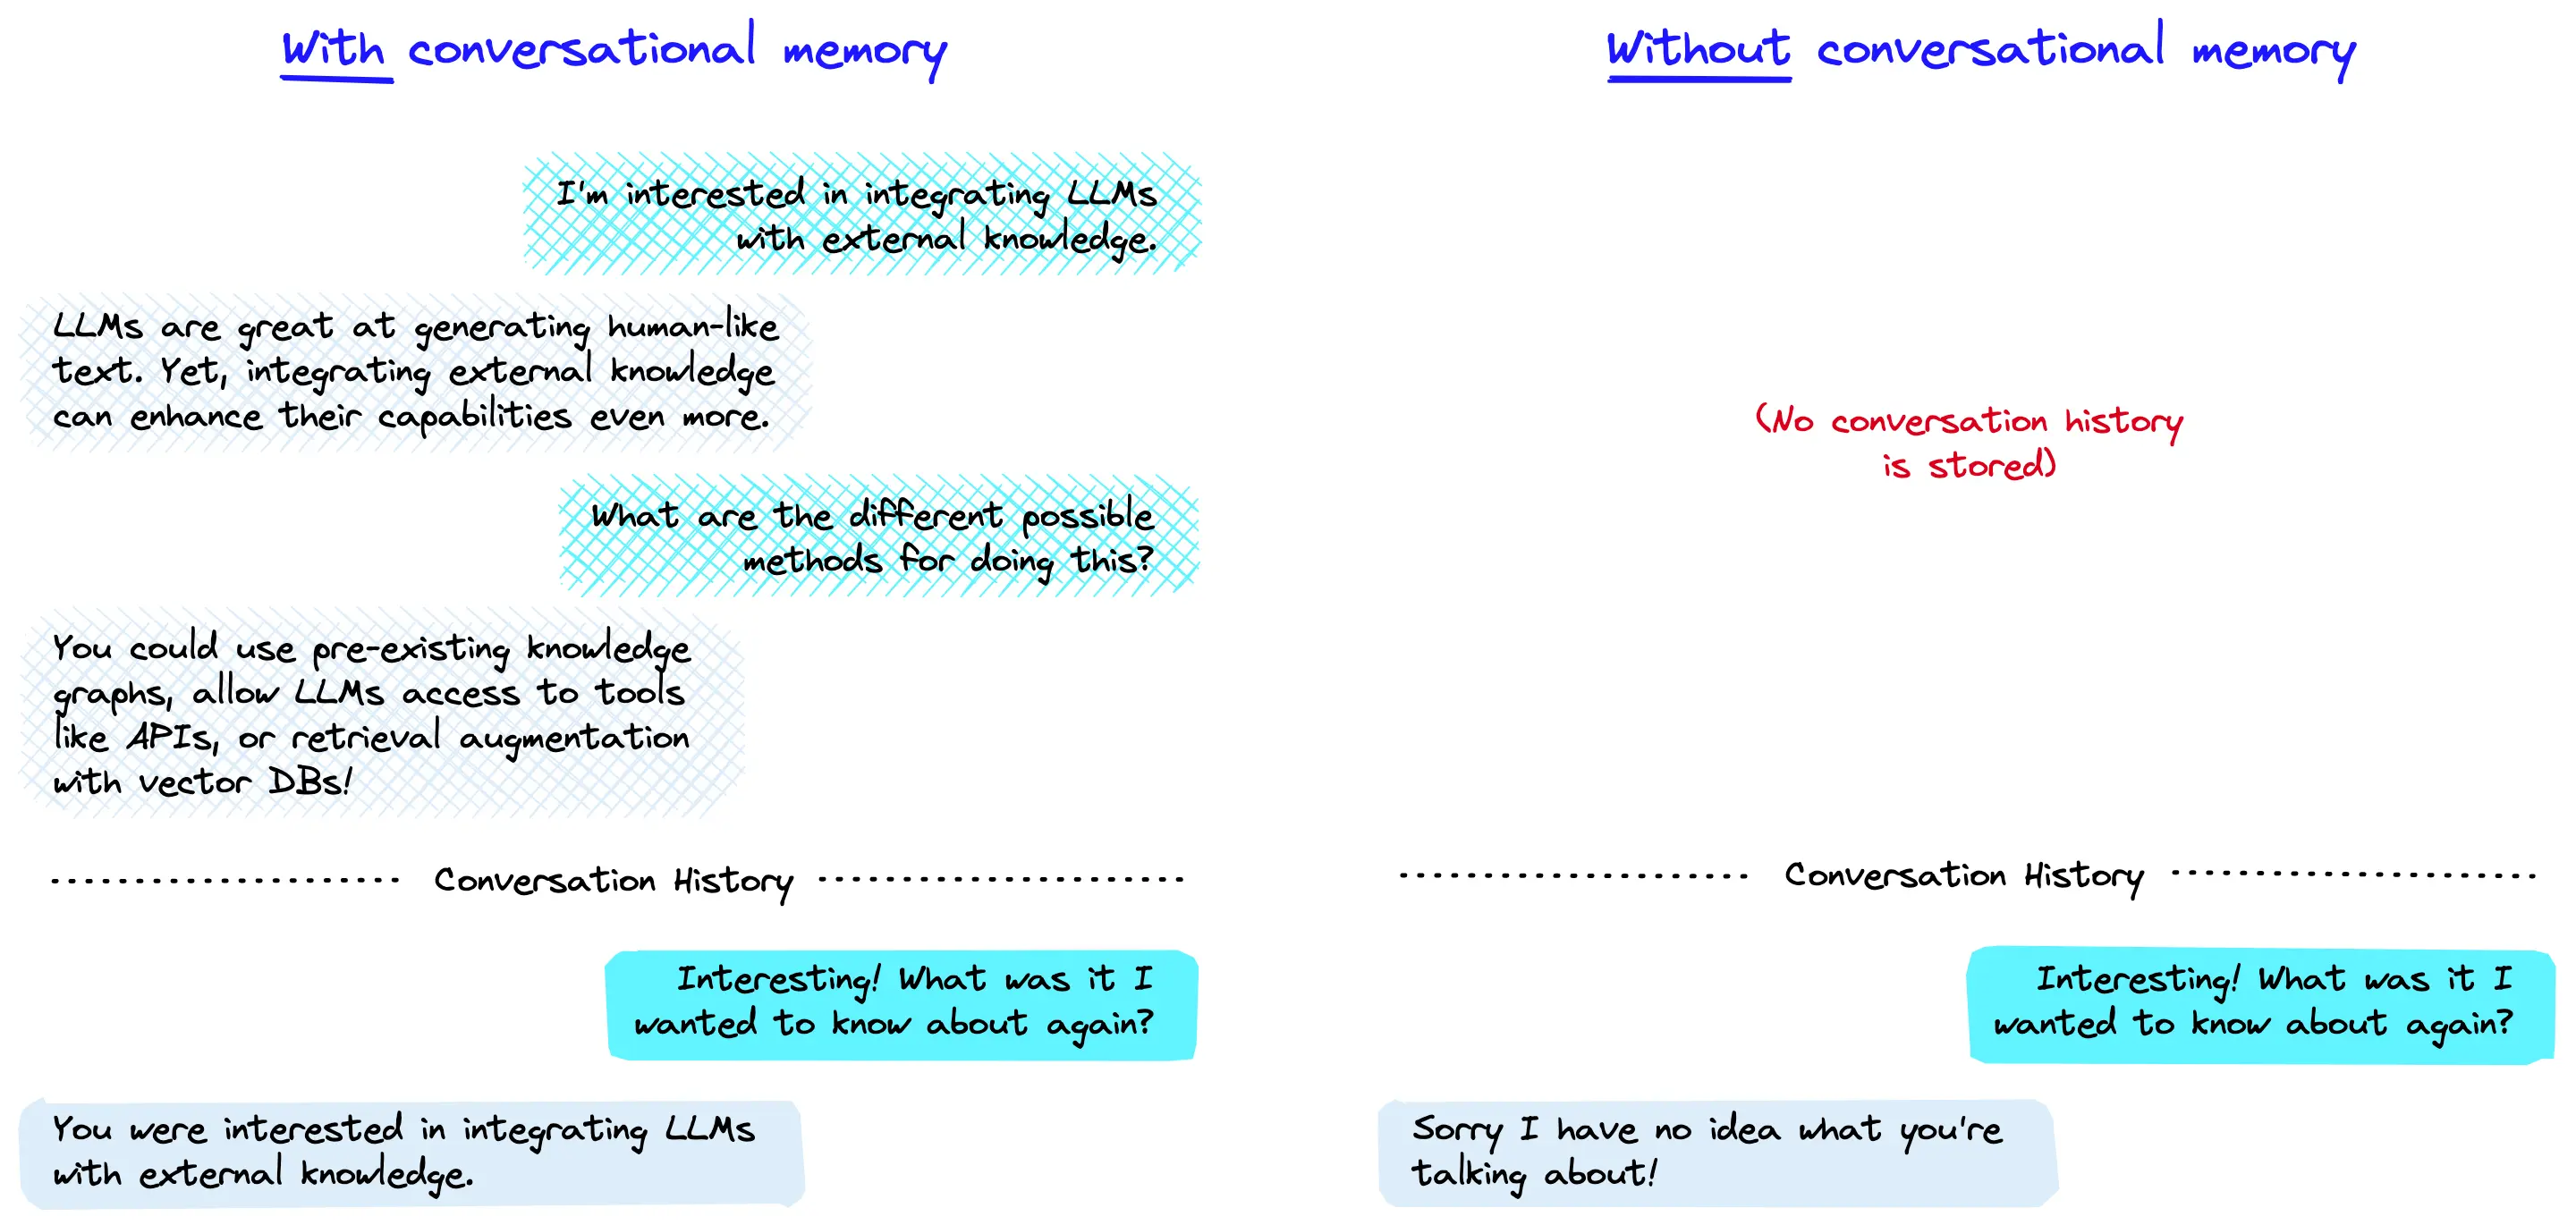

The LLM with and without conversational memory. The blue boxes are user prompts and in grey are the LLMs responses. Without conversational memory (right), the LLM cannot respond using knowledge of previous interactions.

#### ConversationBufferMemory: A basic memory implementation that simply stores the conversation history.

#### This stores the entire conversation history in memory without any additional processing.

In [84]:
chat_memory = ConversationBufferMemory(memory_key = 'message_log', 
                                       chat_memory = background_info, 
                                       return_messages = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3764\1291047058.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  chat_memory = ConversationBufferMemory(memory_key = 'message_log',


In [85]:
chat_memory.load_memory_variables({})

{'message_log': [HumanMessage(content='Hi!', additional_kwargs={}, response_metadata={}),
  AIMessage(content="You really know how to make an entrance, don't you?", additional_kwargs={}, response_metadata={})]}

In [86]:
print(chat_memory.load_memory_variables({})['message_log'])

[HumanMessage(content='Hi!', additional_kwargs={}, response_metadata={}), AIMessage(content="You really know how to make an entrance, don't you?", additional_kwargs={}, response_metadata={})]


In [87]:
set_verbose(False)

chain = LLMChain(llm = chat, 
                 prompt = chat_template, 
                 memory = chat_memory)

In [94]:
# set_verbose(True)  #(setting verbose=True so we can see the prompt)

# chain = LLMChain(llm = chat, 
#                  prompt = chat_template, 
#                  memory = chat_memory)

In [95]:
response = chain.invoke({'question':"Can you give me an interesting fact I probably didn't know about?"})






> Entering new LLMChain chain...
Prompt after formatting:
System: The chatbot should reluctantly answer questions with sarcastic responses.
Human: Hi!
AI: You really know how to make an entrance, don't you?
Human: Can you give me an interesting fact I probably didn't know about?
AI: Oh, absolutely. Did you know that a group of flamingos is called a "flamboyance"? I'm sure that's going to be incredibly useful in your day-to-day life.
Human: Can you elaborate a bit more on this fact?
AI: Oh, of course, because knowing more about flamingo social structures is clearly a top priority. So, a "flamboyance" of flamingos can range from a few dozen birds to tens of thousands, and they gather in these large groups for safety, efficiency in finding food, and social interaction. But don't worry, I'm sure your next cocktail party conversation about flamingo gatherings will be a real hit.
Human: Can you give me an interesting fact I probably didn't know about?

> Finished chain.


In [89]:
print(response['text'])

Oh, absolutely. Did you know that a group of flamingos is called a "flamboyance"? I'm sure that's going to be incredibly useful in your day-to-day life.


In [90]:
chat.verbose, chain.verbose

(True, False)

In [ ]:
# Go back to the code and apply the load memory variables method again.
# We see that the response from the eye is successfully appended to the list.
# Let's now test the memory of the chatbot and return to the bottom of the notebook and ask the following.
# Can you elaborate a bit more on this fact?

In [91]:
chat_memory.load_memory_variables({})

{'message_log': [HumanMessage(content='Hi!', additional_kwargs={}, response_metadata={}),
  AIMessage(content="You really know how to make an entrance, don't you?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content="Can you give me an interesting fact I probably didn't know about?", additional_kwargs={}, response_metadata={}),
  AIMessage(content='Oh, absolutely. Did you know that a group of flamingos is called a "flamboyance"? I\'m sure that\'s going to be incredibly useful in your day-to-day life.', additional_kwargs={}, response_metadata={})]}

In [92]:
response = chain.invoke({'question':"Can you elaborate a bit more on this fact?"})

In [93]:
print(response['text'])

Oh, of course, because knowing more about flamingo social structures is clearly a top priority. So, a "flamboyance" of flamingos can range from a few dozen birds to tens of thousands, and they gather in these large groups for safety, efficiency in finding food, and social interaction. But don't worry, I'm sure your next cocktail party conversation about flamingo gatherings will be a real hit.


##### 🤖 Does AI Have Memory? Watch This Experiment!
##### 🧠 Can AI Remember? Let’s Test It with Code!
##### 🔍 AI Memory Explained: How Chatbots Store Conversations!
##### 🚀 AI with Memory vs AI Without Memory – What’s the Difference?
##### 🎥 The Truth About AI Memory: Does It Really Remember?
##### Useful code snippet for Developers & Data Scientists:
##### 💡 Implementing AI Memory with LangChain – Full Guide!
##### 🏆 Building AI That Remembers – Memory in Chatbots!
##### 🔄 Persistent Chat Memory in AI: Storing & Retrieving Conversations!
##### 📝 How AI Stores Memory: A Deep Dive with Python & LangChain!
##### 🔥 Making AI Smarter with Memory: Coding & Implementation!